In [1]:
%load_ext autoreload
%autoreload 2

## Imports


In [2]:
import pandas as pd

import logging
import sys
import os
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

logger = logging.getLogger(__name__)
filename_ = os.path.basename(globals()["__vsc_ipynb_file__"])
logging.basicConfig(
    handlers=[
        logging.StreamHandler(sys.stdout),
        logging.FileHandler(filename="../logs/logs.log", mode="w"),
    ],
    level=logging.INFO,
    format=f"%(asctime)s - {filename_} - %(name)s - %(levelname)s - %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S",
    force=True,
)

# Custom configs
from src.configs import config, config_test,hpo_config,hpo_config_test
from src.models import EnsembleModel
hpo_spaces = hpo_config_test.copy()
config = config_test.copy()
# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine, load_breast_cancer, load_diabetes


# data = load_wine();task="classification" # classification (multi)
# data = load_breast_cancer();task="classification"  # classification (binary)
data = load_diabetes(); task = "regression"# regression

In [3]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
logger.info("Data loaded")

2024-04-21 00:53:48 - v3.ipynb - __main__ - INFO - Data loaded


In [4]:
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y if task == "classification" else None,
)
X_val, X_test, y_val, y_test = train_test_split(
    X_val,
    y_val,
    test_size=0.5,
    random_state=42,
    stratify=y_val if task == "classification" else None,
)
sets_ = {"train": (X_train, y_train), "val": (X_val, y_val), "test": (X_test, y_test)}

logger.info(f"{X_train.shape=}, {X_val.shape=}, {X_test.shape=}")

2024-04-21 00:53:48 - v3.ipynb - __main__ - INFO - X_train.shape=(309, 10), X_val.shape=(66, 10), X_test.shape=(67, 10)


In [5]:
model = EnsembleModel(config=config, task=task, datasets_=sets_,hpo_config=hpo_config)

2024-04-21 00:53:48 - v3.ipynb - src.utils - INFO - Filling model parameters
2024-04-21 00:53:48 - v3.ipynb - src.utils - INFO - Filled data
2024-04-21 00:53:48 - v3.ipynb - src.utils - INFO - Model parameters filled


In [10]:
model.train(hpo=True)

2024-04-21 00:55:46 - v3.ipynb - src.models - INFO - Training ensemble
2024-04-21 00:55:46 - v3.ipynb - src.models - INFO - Performing hyperparameter optimization on xgboost
2024-04-21 00:55:46 - v3.ipynb - hyperopt.tpe - INFO - build_posterior_wrapper took 0.001533 seconds
2024-04-21 00:55:46 - v3.ipynb - hyperopt.tpe - INFO - TPE using 0 trials
2024-04-21 00:55:46 - v3.ipynb - hyperopt.tpe - INFO - build_posterior_wrapper took 0.001965 seconds
2024-04-21 00:55:46 - v3.ipynb - hyperopt.tpe - INFO - TPE using 1/1 trials with best loss -78.567676
2024-04-21 00:55:46 - v3.ipynb - hyperopt.tpe - INFO - build_posterior_wrapper took 0.001691 seconds
2024-04-21 00:55:46 - v3.ipynb - hyperopt.tpe - INFO - TPE using 2/2 trials with best loss -78.567676
2024-04-21 00:55:46 - v3.ipynb - hyperopt.tpe - INFO - build_posterior_wrapper took 0.001643 seconds
2024-04-21 00:55:46 - v3.ipynb - hyperopt.tpe - INFO - TPE using 3/3 trials with best loss -78.567676
2024-04-21 00:55:46 - v3.ipynb - hyperopt.

2024-04-21 00:56:37 - v3.ipynb - src.utils - INFO - Evaluating model


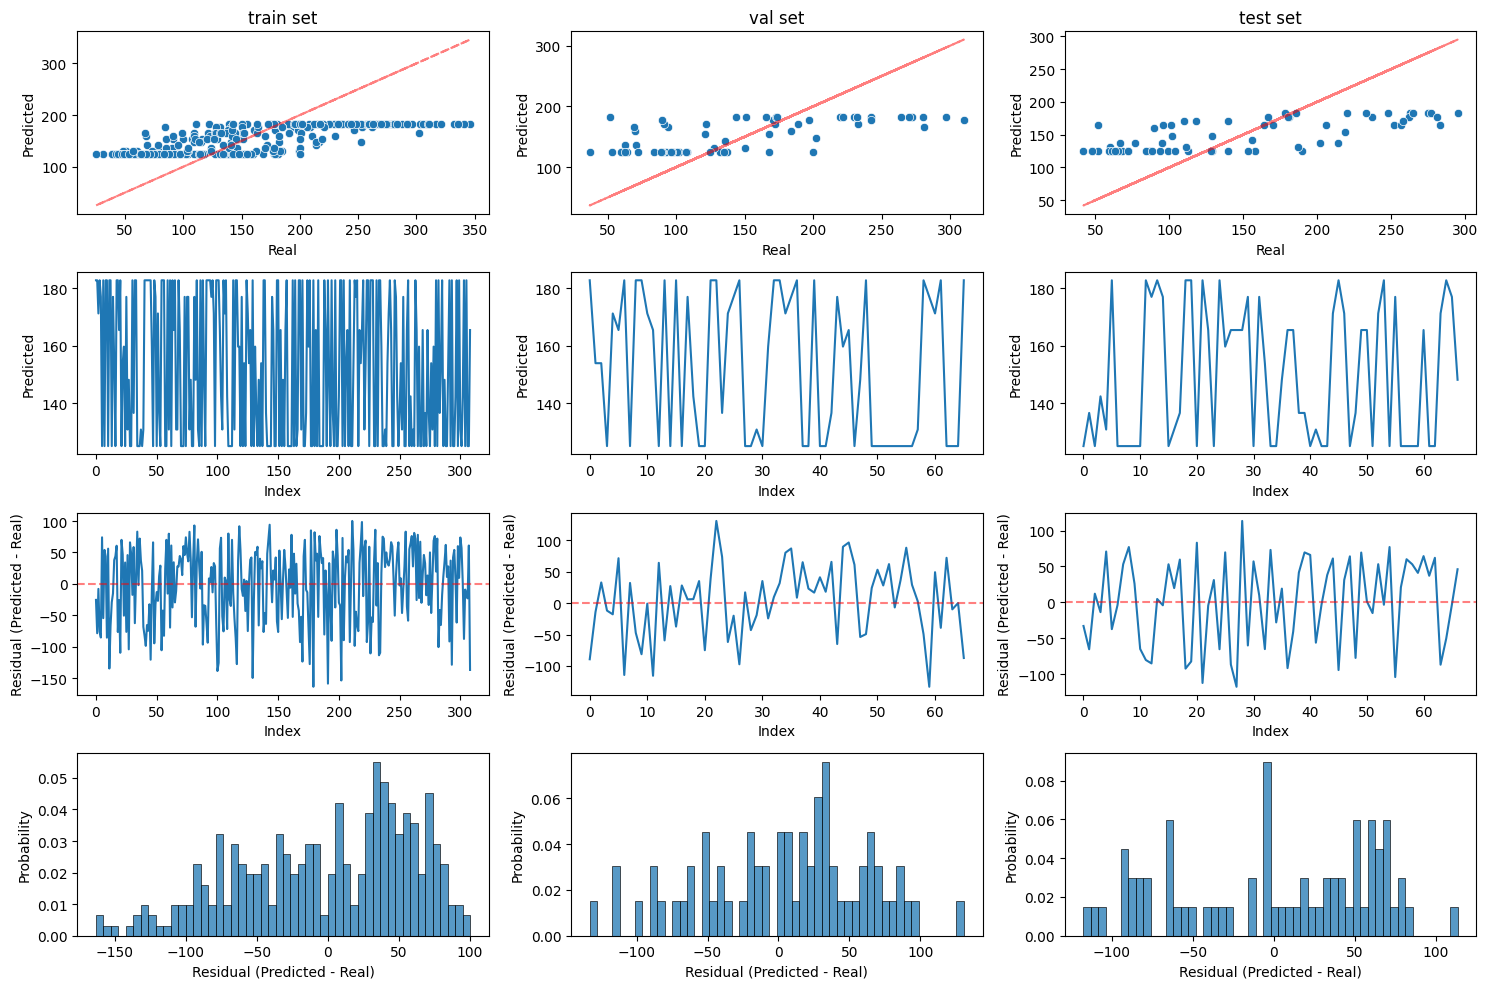

2024-04-21 00:56:38 - v3.ipynb - src.models - INFO - Model evaluation complete. Results saved in model.eval_results


In [11]:
model.evaluate()

In [12]:
model.eval_results

{'train': {'mean_absolute_error': 51.60919,
  'mean_absolute_percentage_error': 0.47903362,
  'mean_squared_error': 3684.9983,
  'root_mean_squared_error': 60.704185,
  'median_absolute_error': 48.09691,
  'r2_score': 0.40064581983384107},
 'val': {'mean_absolute_error': 47.890526,
  'mean_absolute_percentage_error': 0.45190153,
  'mean_squared_error': 3375.3867,
  'root_mean_squared_error': 58.09808,
  'median_absolute_error': 40.194,
  'r2_score': 0.33994875653941814},
 'test': {'mean_absolute_error': 52.50577,
  'mean_absolute_percentage_error': 0.4940238,
  'mean_squared_error': 3688.7224,
  'root_mean_squared_error': 60.73485,
  'median_absolute_error': 57.09691,
  'r2_score': 0.35034580871150267}}